**CS547 HW1 Group 32**  
Yue Cui  
Gaoyu Liu

Colab link:
https://colab.research.google.com/github/052D/CS547_SP2021/blob/main/HW1/CS547_HW1_Group_32.ipynb

# Problem 1

(1)
$$
\nabla f(\boldsymbol{x})= \begin{pmatrix} 18x_1 \\
                            2x_2 
                            \end{pmatrix}
$$

(2)
From fundemantal definition of calculus, we have

$$
\boldsymbol{X_t}'=\frac{d\boldsymbol{X_t}}{dt}=\lim_{\Delta t\to 0}\frac{\boldsymbol{X}_{t+\Delta t}-\boldsymbol{X}_{t}}{\Delta t}=\lim_{\delta\to 0}\frac{\boldsymbol{X}_{t+\delta}-\boldsymbol{X}_{t}}{\delta}=\lim_{\delta\to 0}\frac{\boldsymbol{x}_{\lfloor \frac{t}{\delta} \rfloor +1}-\boldsymbol{x}_{\lfloor \frac{t}{\delta} \rfloor}}{\delta}
$$

Now we have

$$
\boldsymbol{x}_{\lfloor \frac{t}{\delta} \rfloor +1}-\boldsymbol{x}_{\lfloor \frac{t}{\delta} \rfloor}=\boldsymbol{x}_{n+1}-\boldsymbol{x}_n=-\delta\nabla f(\boldsymbol{x}_n)
$$

Therefore

$$
\boldsymbol{X_t}'=\lim_{\delta\to 0}\frac{-\delta\nabla f(\boldsymbol{x}_n)}{\delta}=\lim_{\delta\to 0}-\nabla f(\boldsymbol{x}_n)=-\nabla f(\boldsymbol{x}_n) \\
=- \begin{pmatrix} 18x_1 \\
            2x_2
            \end{pmatrix}_{\lfloor t/\delta \rfloor} 
=-\begin{pmatrix} 18X_1 \\
            2X_2
            \end{pmatrix}_{t}
$$

The system of ODE for $\lim_{\delta\to 0}\boldsymbol{X}_t$ is

$$
X_1'+18X_1=0 \\
X_2'+2X_2=0
$$

(3)
Sove the system of ODE

$$
X_1'+18X_1=0 \\
\frac{dX_1}{dt}\frac{1}{X_1}=-18 \\
\frac{1}{X_1}dX_1=-18 dt \\
\ln{X_1}=-18t+C_1 \\
X_1=Ae^{-18t}
$$

Similarly we have $X_2=Be^{-2t}$. Now substitute the initial condition of $\boldsymbol{x}_0=\boldsymbol{X}_0=(1,2)$, we have

$$
A=1\\
B=2
$$

The solution for the ODE is

$$
X_1=e^{-18t} \\
X_2=2e^{-2t}
$$

From the solution of ODE, we can conclude that X converges exponentially to the minimum point of (0,0) from initial point of (1,2) at step 0 when t tends to infinity. This is the minimum converges rate of gradient decent when we choose a step size tending to 0.

# Problem 2

**(1) Explicitly describe the gradient descent iteration $x_{n+1} = x_n − \delta f′(x_n)$.**

First compute the gradient:  

$$
f′(x_n) = 2 \lambda x_n
$$  

Then we have the explicit expression for the gradient descent iteration: 

$$
x_{n+1} = x_n − \delta f′(x_n) = x_n − 2 \delta \lambda x_n \\
x_{n+1} = (1 - 2 \delta \lambda) x_n
$$

**(2) Describe the stability of gradient descent iteration for different values of $\delta$.**

Regardless of the sign of $x_n$, then the gradient descent is stable, $x_{n+1}$ always tend to approach the optimal point $x = 0$. Hence, $\|1 - 2 \lambda \delta \| < 1$ should be satisfied.

$$
\|1 - 2 \lambda \delta \| < 1 \\
0 < \delta < \frac{1}{\lambda}, \lambda > 0.
$$

Therefore, the gradient descent will be stable when $ 0 < \delta < \frac{1}{\lambda} $ and converges to 0. The gradient descent is unstable and diverges for all other values of $\delta$.

# Problem 3

In [1]:
import os
import numpy as np
import pandas as pd
from IPython.display import Markdown as md
import time
import random
import matplotlib
#%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.stats
#from pandas.plotting import autocorrelation_plot
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter

import imageio
import PIL

def saver(fname):
    plt.savefig(fname+".png",bbox_inches="tight")
    
def legend(pos="bottom",ncol=3,extra=False):
    if pos=="bottom":
        extra = 0.15 if extra else 0
        plt.legend(bbox_to_anchor=(0.5,-0.2-extra), loc='upper center',facecolor="lightgray",ncol=ncol)
    elif pos=="side":
        plt.legend(bbox_to_anchor=(1.1,0.5), loc='center left',facecolor="lightgray",ncol=1)
        
def textbox(txt,fname=None):
    plt.figure(figsize=(1,1))
    plt.gca().add_artist(offsetbox.AnchoredText("\n".join(txt), loc="center",prop=dict(size=30)))
    plt.axis('off')
    if fname is not None:
        saver(fname)
    plt.show()
    plt.close()

Load the data.

In [2]:
# tries to get local version and then defaults to google drive version
def getfile(location_pair, **kwargs):
    (loc, gdrive) = location_pair
    try:
        out = pd.read_csv(loc, **kwargs)
    except FileNotFoundError:
        print("local file not found; accessing Google Drive")
        loc = 'https://drive.google.com/uc?export=download&id=' + \
            gdrive.split('/')[-2]
        out = pd.read_csv(loc, **kwargs)
    return out

In [3]:
columns=[
"CIC0",
"SM1_Dz(Z)",
"GATS1i",
"NdsCH",
"NdssC",
"MLOGP",
"LC50" #response
]
fname = ("qsar_fish_toxicity.csv",
         "https://drive.google.com/file/d/1xd30VCQ2clQPzHDXpDi-VPU6pGTIUmQg/view?usp=sharing")

data_raw = getfile(fname, sep=";", names=columns)

local file not found; accessing Google Drive


In [4]:
data_raw.head()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [5]:
feature, response = ["CIC0", "SM1_Dz(Z)", "GATS1i", "MLOGP"], "LC50"
data=data_raw.copy()
X=data[feature]
Y=data[response]
display(X.head())
display(Y.head())

,CIC0,SM1_Dz(Z),GATS1i,MLOGP
0,3.260,0.829,1.676,1.453
1,2.189,0.580,0.863,1.348
2,2.125,0.638,0.831,1.348
3,3.027,0.331,1.472,1.807
4,2.094,0.827,0.860,1.886


0    3.770
1    3.115
2    3.531
3    3.510
4    5.390
Name: LC50, dtype: float64

## (1) Sklearn

**Use sklearn to find the formula (i.e., coefficients) for the linear regression.**

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, Y)
coe_sklearn = reg.coef_
display(coe_sklearn)
intrcpt_slkearn = reg.intercept_
display(intrcpt_slkearn)

array([ 0.44750162,  1.22068139, -0.77463965,  0.38310065])

2.1943526381758236

The expression of the linear regression is  
**LC50 = 0.4475 $\times$ CIC0 + 1.2207 $\times$ SM1 Dz(Z) - 0.7746 $\times$ GATS1i + 0.3831 $\times$ MLOGP + 2.1944**

## (2) Numpy Implementation

**Derive the explicit formula for multidimensional linear regression and implement it in numpy to get explicit coefficients.**

### Implementing the normal equation.

When there are more than one varibale as input $x$ in the linear regression, we have the design matrix $X_{n \times (p+1)}$ , where $n$ is the number of the training samples and $p$ is the number of the variables considered in the linear regression model. Each training same is a row in the design matrix. The additional column in the design matrix is $1$'s to account for the intercept of the linear regression. Thus, we have parameter vector $P_{(p+1) \times 1} = \left ( m^T, b \right)^T$. In summary, the linear regression model should look like  
$$
y_n = X_{n \times (p+1)} \   P_{(p+1) \times 1}
$$
To obtain the optimal parameters $P^*$ of the linear regression model, one can compute the mean squared error (MSE) of the predicted $y_n$ and the ground truth $y_{train}$, which is
$$
\Lambda(P) = \frac{1}{n} \sum_{i = 1}^{N} \left ( y_{train,\ i} -   X_{i} \  P_{(p+1) \times 1} \  \right )^2
$$
Take the derivative of the MSE $\Lambda(P)$ with respect to the parameters $P$ and make it equal to $0$, the solution of which is the solution for the multivariate linear regression.
$$
\nabla_{P} \  \Lambda(P) = 0 \\
\nabla_{P} \ \left(y_{train} -   X P \  \right)^T \left(y_{train} -   X  P \  \right) = 0 \\
2 X^T X P - 2 X^T y_{train} = 0 \\
P = \left(X^T X \right)^{-1} X^T y_{train}
$$
The Pyhton implementation of the normal equation is shown in the cell below.

In [7]:
XX = np.hstack([np.array(X), np.array(
    [1]*X.shape[0]).reshape((X.shape[0], 1))])
m = np.linalg.inv(XX.T@XX)@(XX.T)@(Y)
print(f'----- Method 1 ------')
print(f'The coefficients of the linear regression model are:')
display(m[:-1])
print(f'The intercept of the linear regression model is:')
display(m[-1])

----- Method 1 ------
The coefficients of the linear regression model are:


array([ 0.44750162,  1.22068139, -0.77463965,  0.38310065])

The intercept of the linear regression model is:


2.1943526381757947

The results are same as (1):  
**LC50 = 0.4475 $\times$ CIC0 + 1.2207 $\times$ SM1 Dz(Z) - 0.7746 $\times$ GATS1i + 0.3831 $\times$ MLOGP + 2.1944**

## (3) Gradient Descent

The gradient decent is implemented in the cell below.  

More specifically, a class named **LinearRegression_multi** is defined to get multivariate linear regression models. The method **gradient_descent** in the class conducts the gradient decent inparticular.

For each iteration of the gradient descent, all training data are used (1 epoch). The cost, i.e. the difference between the predicted $y$ and the ground truth $y_{train}$, 
$$
\epsilon_i(P) \  = \  y_{train,\ i} \  - \   X_{i}  P
$$
as well as the gradient of the cost fucntion $\Lambda(P)$ with respect to the learning rate $\delta$ at $\delta = 0$ 
$$
\nabla\Lambda (P) \  = \  -\frac{2}{n} \sum_{i = 1}^{n} \epsilon_i(P) X_{i}
$$
is computed in the function **Cost**. 

The parameters $P$ is then updated by $\delta$ and the computed gradient $\nabla\Lambda (P)$:
$$
P_{i + 1} = P_i - \delta \nabla\Lambda (P)
$$
where $i$ is the iteration step number. 

The number of the iterations for the gradient descent is controlled by two factors: (1) maximum allowable number of iterations; (2) the gradient step L2 norm $\| \nabla\Lambda (P) \|^2$. Both factors are compared with the input tolerance during each iteration.  

The detailed Python implementation is presented below, as well as the computed optimal parameters $P$.

In [8]:
class LinearRegression_multi:
    def __init__(self, x, y):
        self.xvals = np.array(x)
        self.nsamples = self.xvals.shape[0]
        self.nvars = self.xvals.shape[1]

        self.yvals = np.array(y).reshape((self.nsamples, 1))

        self.XXvals = np.hstack(
            [self.xvals, np.array(([1]*self.nsamples)).reshape((self.nsamples, 1))])
        self.reset()

    def reset(self):
        self.ctr = 0
        self.callbacktext = []
        self.p = [np.zeros([self.nvars, 1]), 0.]
        self.lr = 0.0001
        #self.b = 0.

    @staticmethod
    def linear_function(p):
        (m, b) = p

        def l_f(x):
            return x@m + b
        return l_f

    def Cost(self, p, include_gradient=False):
        err = self.yvals-self.linear_function(p)(self.xvals)
        cost = np.mean(err**2)
        # print(err)
        if include_gradient:
            out = -2*np.mean(err*self.XXvals, axis=0)
            return (cost, out)
        else:
            return cost

    def gradient_descent(self, epochs, p=None, lr=None,
                         precision=0.01):
        if lr == None:
            lr = self.lr
        if p == None:
            p = self.p
        m = p[0]
        b = p[1]
        step_size = 1.
        i = 0
        cost_history = np.array([])
        m_history = np.array([m])
        b_history = np.array([b])
        while step_size > precision and i < epochs:
            cost, gradient = self.Cost([m, b], True)
            cost_history = np.append(cost_history, cost)
            m = m - lr*gradient[:-1].reshape((self.nvars, 1))
            b = b - lr*gradient[-1]
            m_history = np.append(m_history, m.T)
            b_history = np.append(b_history, b)
            step_size = np.linalg.norm(gradient)
            i += 1
        #
        print(f'Gradient descent total iterations: {i}')
        return m.T, b, cost_history, m_history, b_history

    def metric(self, p):
        (m, b) = p
        err = self.yvals-self.linear_function(p)(self.xvals)
        return np.mean(np.abs(err))

    def callback(self, x, verbose=False):
        (m, b) = p
        outstr = "ctr={0:}; (m,b)=({1:.3f},{2:.2E}); error={3:.2E}".format(
            self.ctr, m, b, self.Cost(p))
        self.callbacktext.append(outstr)
        if verbose:
            print(outstr)
        self.ctr += 1




Now carry out the gradient descent for the linear regration given the $X$ and $y$ data. The maximum iteration number is set to be 10000. The tolerance for the L2 norm of the gradient update step size is $10^{-10}$. By trying several different learning rate or $\delta$, it was found that $\delta = 0.05$ could be a good choice with stable condition and reseaonable number of iterations.

Gradient descent total iterations: 7521


array([[ 0.44750162,  1.22068139, -0.77463965,  0.38310065]])

2.1943526365103576

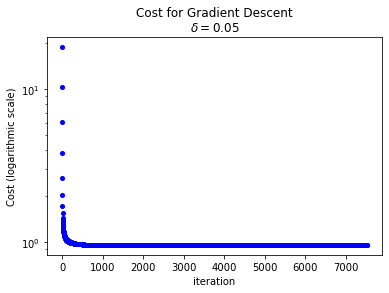

In [9]:
LR = LinearRegression_multi(X, Y)

delta = 0.05
m_gd, b_gd, cost_his, m_his, b_his = LR.gradient_descent(10000, lr=delta,
                                                         precision=1e-10)
display(m_gd)
display(b_gd)

title = []
title.append("Cost for Gradient Descent")
title.append(r"$\delta={:.2f}$".format(delta))
plt.figure()
plt.semilogy(cost_his, 'bo', ms=4)
plt.ylabel("Cost (logarithmic scale)")
plt.xlabel("iteration")
plt.title("\n".join(title))
saver("increasing_cost")
plt.show()
plt.close()

The results agree with (1) and (2):  
**LC50 = 0.4475 $\times$ CIC0 + 1.2207 $\times$ SM1 Dz(Z) - 0.7746 $\times$ GATS1i + 0.3831 $\times$ MLOGP + 2.1944**